# Soal 4

Sebuah perusahaan memproduksi bola lampu dengan diameter 10 ± y cm. Distribusi diameter bola lampu tersebut berdistribusi normal dengan rata-rata 10 cm dan standar deviasi 0.3 cm. Perusahaan tersebut ingin memastikan bahwa setidaknya 80% bola lampu yang diproduksi memiliki diameter kurang dari 11 cm. Berapakah nilai y yang harus ditetapkan?

Import Library

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Mendata semua variabel yang diketahui pada soal

In [19]:
# Diberikan
mean = 10      # Rata-rata diameter bola lampu (cm)
std_dev = 0.3  # Standar deviasi diameter bola lampu (cm)
conf_level = 0.8  # Tingkat kepercayaan yang diinginkan (80%)
max_diam = 11  # Diameter maksimal yang diinginkan (cm)

Menghitung nilai z-score untuk tingkat kepercayaan 80%

In [20]:
z_score = norm.ppf(conf_level)
print(f"Nilai z-score untuk tingkat kepercayaan {conf_level*100}% adalah: {z_score:.2f}")

Nilai z-score untuk tingkat kepercayaan 80.0% adalah: 0.84


Visualisasi nilai z score < 80%

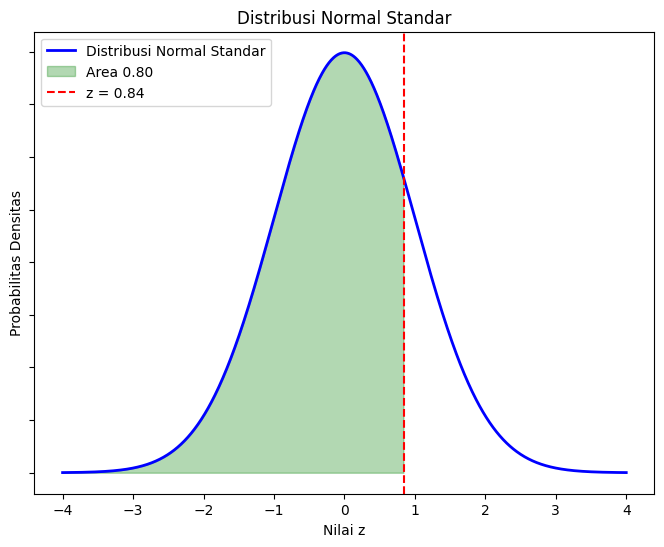

In [21]:
# Membuat array x untuk visualisasi distribusi normal
x = np.linspace(-4, 4, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Menghitung area di bawah kurva sebelah kiri dari z-score 1.04
area_left = np.trapz(y[:np.where(x <= z_score)[0][-1]+1], x[:np.where(x <= z_score)[0][-1]+1])
area_right = 1 - area_left

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'b-', lw=2, label='Distribusi Normal Standar')
ax.fill_between(x, 0, y, where=(x < z_score), color='g', alpha=0.3, label=f'Area {area_left:.2f}')
ax.axvline(z_score, color='r', linestyle='--', label=f'z = {z_score:.2f}')
ax.legend(loc='upper left')
ax.set_title('Distribusi Normal Standar')
ax.set_xlabel('Nilai z')
ax.set_ylabel('Probabilitas Densitas')
ax.tick_params(axis='y', labelleft=False)  # Menyembunyikan angka pada sumbu y
plt.savefig("z-score.jpg")
plt.show()

Menghitung nilai y

In [22]:
# Menghitung nilai y
y = z_score * std_dev
print(f"Nilai y adalah: {y:.3f} cm")

Nilai y adalah: 0.252 cm


Batas atas diameter bola agar 80% bola memiliki diameter < 11 cm

In [23]:
# Menghitung batas atas
upper_a = mean + y
print(f"Batas atas RAM: {upper_a:.3f} cm")

Batas atas RAM: 10.252 cm


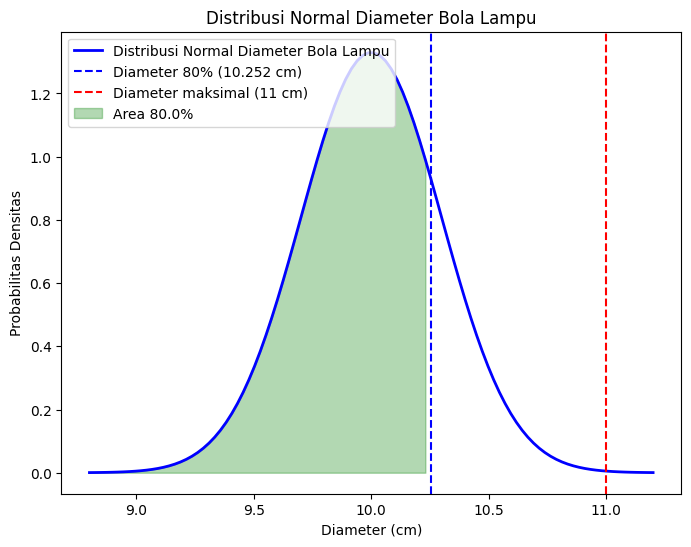

In [24]:
# Memvisualisasikan distribusi normal
x_axis = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = norm.pdf(x_axis, loc=mean, scale=std_dev)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_axis, y, 'b-', lw=2, label='Distribusi Normal Diameter Bola Lampu')
ax.axvline(upper_a, color='b', linestyle='--', label=f'Diameter 80% ({upper_a:.3f} cm)')
ax.axvline(max_diam, color='r', linestyle='--', label=f'Diameter maksimal ({max_diam} cm)')
ax.fill_between(x_axis, 0, y, where=(x_axis <= upper_a), color='g', alpha=0.3, label=f'Area {conf_level*100}%')
ax.legend(loc='upper left')
ax.set_title('Distribusi Normal Diameter Bola Lampu')
ax.set_xlabel('Diameter (cm)')
ax.set_ylabel('Probabilitas Densitas')
plt.savefig("diameter-lampu.jpg")
plt.show()